# First Analysis

### Importing all needed packages

In [473]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
from tqdm import tqdm 

### Mechanism to hidden some words from analysis.

In [474]:
# SHOW_USELESS_WORDS = True
SHOW_USELESS_WORDS = False

In [475]:
uselessWords = {
    'o', 'a', 'os', 'as', 
    'um', 'uma', 'uns', 'umas', 
    'e',
    'de', 'do', 'da',
    'sobre',
    'ma',
    'lo', 'la'
    'que',
    'se',
    'em',
    'com',
    'é',
    'que'
}
# uselessWords

### Loading into a dataframe the content of the dataset (CSV file)

In [476]:
rawDf = pd.read_csv( 
    './datasets/treated_csv_file.csv',
    encoding = 'UTF8',
    sep = ';');
rawDf.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


In [477]:
len(rawDf)

72777

### Some manipulation to the strings.

- lower case
- replace some symbols

In [478]:
df = rawDf['review_text'].str.lower()
df.head()

0    sabe todos aqueles livros que ensinam você a c...
1    ensinamentos que eu tive quando li o livro:1. ...
2    sucinto livro de parábolas, o homem mais rico ...
3    de forma clara traz ensinamentos sobre educaçã...
4    o livro o homem mais rico da babilônia está fa...
Name: review_text, dtype: object

In [479]:
df[1]

'ensinamentos que eu tive quando li o livro:1. primeiro pague a si mesmo e depois aos outros.“uma parte de todos os seus ganhos pertencem exclusivamente a você.”quando trabalhamos e recebemos o dinheiro, é essencial que peguemos uma parte para guardar. no livro se fala que se você ganha 10 moedas, você precisa guardar pelo menos uma. as outras 9 moedas você pode gastar. mas quando se diz em gastar, estão falando das coisas que realmente precisamos ter. gastar com necessidades, e não com desejos.precisamos gastar menos do que ganhamos.2. controle os seus gastos. muitas pessoas acham que o salário que ganham não é o suficiente para pagar as contas do mês, quem dirá conseguir guardar um dinheiro. por isso, precisamos saber exatamente no que gastamos. é necessário examinar cuidadosamente seu habitual modo de viver, para isso, é fundamental anotar as suas despesas, fazer um orçamento para saber o que é essencial é o que pode ser cortado.3. multiplique o seu dinheiro.depois que você consegui

In [480]:
def cleanWord( word ):
    
    word = word.replace(',', '')
    word = word.replace('.', '')
    word = word.replace('❤', '')
    word = word.replace('💜', '')

    return word

### Creating a list with all unique words to use further.

In [ ]:
# For time counting
startTime = time.time()

allWords = list()
words = list()

for review in df:
    
#     print(review)
    rawWords = str(review).split()
    
    for word in rawWords:
        word = cleanWord( word )
        
        if word not in words:
            words.append( word )

if not SHOW_USELESS_WORDS:
    
    for word in words:
        if word in uselessWords:
            continue
        else:
            allWords.append( word )
        
else: 
    allWords = words
    
# allWords

# For time counting
endTime = time.time()
elapsedTime = endTime - startTime
print( f'Running Time: {elapsedTime / 60} minutes' )

### Total of unique words.

In [ ]:
print( 'List size: {}'.format( len(allWords) ) )

### Build a word cloud with all unique words.

In [ ]:
allJoinedWords = " ".join( allWords ) + " "

if SHOW_USELESS_WORDS:

    wordcloud = WordCloud(
        width = 800, 
        height = 800,
        background_color ='white',
        min_font_size = 10
    ).generate( allJoinedWords )
    
else:
    
    wordcloud = WordCloud(
        width = 800, 
        height = 800,
        background_color ='white',
        stopwords = uselessWords,
        min_font_size = 12
    ).generate( allJoinedWords )

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Seeing the words and each total in a table way.

In [ ]:
allWordsDict = {}
for review in df:
    
    # print(review)
    
    words = str(review).split()
    # print(words)
    
    for word in words:
        
        if (not SHOW_USELESS_WORDS) and (word in uselessWords):
            continue
        
        word = cleanWord( word )
        
        if word not in allWordsDict.keys():
            
            allWordsDict[word] = 1
            
        else:
            
            allWordsDict[word] += 1

# print( allWordsDict )

In [ ]:
allWordsDF = pd.DataFrame()

allWordsDF[ 'word' ] = allWordsDict.keys()
allWordsDF[ 'count' ] = allWordsDict.values()

allWordsDF.head(10)

In [ ]:
allWordsDF.sort_values(
    by = 'count',
    ascending = 0)

# Second Analysis

#### Using Spacy and K-Means to analyze the tokens and try to group the contained sentences in each review.

#### Good tutorials and other texts

- Tutorial: Text Classification in Python Using spaCy
https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

## Importing all needed packages

#### Command to install **spaCy** package: ***pip install spacy***

In [189]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import spacy
from tqdm import tqdm 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

## Installing and loading the Portuguese pipeline.
#### To install Portuguese pipeline by command line, type: *python -m spacy download pt_core_news_lg*
#### See more on: https://spacy.io/models/pt#pt_core_news_lg


In [190]:
nlp = spacy.load('pt_core_news_lg') # https://spacy.io/models/pt#pt_core_news_lg

In [191]:
rawDf = pd.read_csv( 
    './datasets/treated_csv_file.csv',
    encoding = 'UTF8',
    sep = ';');
rawDf.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


In [192]:
df = rawDf
df.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


## Some values in the *review_text* column are *nan* so I changed the values to an empty string to avoid breaking the program when reading each item to extract the sentences.

One example:

|book_id|review_id|review_rating|review_title|review_text|
|:------|:------:|:------:|:------|:------:|
|8547000240|R1QX38W7D6QOQ4|5<!-- .element: style="text-align:center;" -->|livro maravilhoso, ainda estou acabando de ler mais posso afirma que e espetacular.|nan|

In [193]:
rawDf = pd.read_csv( 
    './datasets/treated_csv_file.csv',
    encoding = 'UTF8',
    sep = ';');
rawDf.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


In [194]:
df = rawDf
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72777 entries, 0 to 72776
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   book_id        72777 non-null  int64 
 1   review_id      72777 non-null  object
 2   review_rating  72777 non-null  object
 3   review_title   72700 non-null  object
 4   review_text    72774 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [195]:
df['review_text'] = df['review_text'].fillna('')

In [196]:
df['review_text'].isnull().values.any()

False

In [197]:
reviewPosition = 1

In [198]:
df.iloc[reviewPosition]

book_id                                                 8595081530
review_id                                           R3KC0ZLPQX85LT
review_rating                                                    5
review_title                                       Livro excelente
review_text      Ensinamentos que eu tive quando li o livro:1. ...
Name: 1, dtype: object

In [199]:
doc = nlp( u''.join(df.iloc[reviewPosition]['review_text']) )
doc

Ensinamentos que eu tive quando li o livro:1. Primeiro pague a si mesmo e depois aos outros.“Uma parte de todos os seus ganhos pertencem exclusivamente a você.”Quando trabalhamos e recebemos o dinheiro, é essencial que peguemos uma parte para guardar. No livro se fala que se você ganha 10 moedas, você precisa guardar pelo menos uma. As outras 9 moedas você pode gastar. Mas quando se diz em gastar, estão falando das coisas que realmente precisamos ter. Gastar com necessidades, e não com desejos.Precisamos gastar menos do que ganhamos.2. Controle os seus gastos. Muitas pessoas acham que o salário que ganham não é o suficiente para pagar as contas do mês, quem dirá conseguir guardar um dinheiro. Por isso, precisamos saber exatamente no que gastamos. É necessário examinar cuidadosamente seu habitual modo de viver, para isso, é fundamental anotar as suas despesas, fazer um orçamento para saber o que é essencial é o que pode ser cortado.3. Multiplique o seu dinheiro.Depois que você conseguir

In [200]:
totalTokensToPrint = 30

print( f'Printing the first {totalTokensToPrint}th tokens:\n' )

for token in doc[0:totalTokensToPrint]:
    print( f'{token.text:{15}} {spacy.explain(token.pos_):{30}} {token.lemma_:{15}}' )

Printing the first 30th tokens:

Ensinamentos    noun                           Ensinamentos   
que             pronoun                        que            
eu              pronoun                        eu             
tive            verb                           ter            
quando          subordinating conjunction      quando         
li              verb                           ler            
o               determiner                     o              
livro:1         noun                           livro:1        
.               punctuation                    .              
Primeiro        adverb                         Primeiro       
pague           verb                           pagar          
a               adposition                     o              
si              pronoun                        si             
mesmo           adverb                         mesmo          
e               coordinating conjunction       e              
depois          adverb

In [201]:
for sentence in doc.sents:
    
    print( f'{sentence}' )
    print( f'--- Sentence size: {len(sentence)}' )
    print()

Ensinamentos que eu tive quando li o livro:1.
--- Sentence size: 9

Primeiro pague a si mesmo e depois aos outros.
--- Sentence size: 10

“Uma parte de todos os seus ganhos pertencem exclusivamente a você.
--- Sentence size: 12

”Quando trabalhamos e recebemos o dinheiro, é essencial que peguemos uma parte para guardar.
--- Sentence size: 16

No livro se fala que se você ganha 10 moedas, você precisa guardar pelo menos uma.
--- Sentence size: 18

As outras 9 moedas você pode gastar.
--- Sentence size: 8

Mas quando se diz em gastar, estão falando das coisas que realmente precisamos ter.
--- Sentence size: 16

Gastar com necessidades, e não com desejos.
--- Sentence size: 9

Precisamos gastar menos do que ganhamos.2.
--- Sentence size: 7

Controle os seus gastos.
--- Sentence size: 5

Muitas pessoas acham que o salário que ganham não é o suficiente para pagar as contas do mês, quem dirá conseguir guardar um dinheiro.
--- Sentence size: 26

Por isso, precisamos saber exatamente no que ga

## Building a dataframe of sentences and building a new dataset of sentences.

In [202]:
# # totalReviews = 10
# # totalReviews = 10000
# # i = 0

# # For time counting
# startTime = time.time()

# csvFile = './datasets/sentences.csv'
# csvDF = pd.DataFrame(columns = [
#     'book_id', 
#     'review_id', 
#     'review_rating', 
#     # 'review_title', 
#     'sentence'
# ]) 

# # for index in tqdm( range(0, totalReviews), desc="Progress", ncols=100 ):
# for index in tqdm( range(0, len(df)), desc="Progress", ncols=100 ):
    
#     review = df.iloc[index]
        
#     # print( f"- Book ID: {review['book_id']}" )
#     # print( f"- Review ID: {review['review_id']}" )
#     # print( f"- Review Rating: {review['review_rating']}" )
#     # print( f"- Review Title: {review['review_title']}" )
#     # print( f"- Review Text: {review['review_text']}" )
#     # print()
    
#     doc = nlp( u''.join( review['review_text'] ) )
#     # print(doc[0])
#     # print()
    
#     # print( '- Sentences' )
#     # print()
    
#     for sentence in doc.sents:
    
#         # print( f'{sentence}' )
#         # print( f'--- Sentence size: {len(sentence)}' )
#         # print()
        
#         row = {
#             'book_id': review['book_id'],
#             'review_id': review['review_id'],
#             'review_rating': review['review_rating'],
#             # 'review_title': review['review_title'],
#             'sentence': sentence
#         }
#         csvDF.loc[ len(csvDF), csvDF.columns ] = row
        
#         # print(i)
#         # print( f"review_id: {review['review_id']}" )
#         # print(sentence)
#         # print()
        
#         # i = i + 1
    
#     # print('\n======================================= Another Review =======================================\n\n')
    
# csvDF.to_csv(
#     csvFile, 
#     encoding = 'utf-8', 
#     index = False,
#     sep=';'
# )
# # print( csvDF )

# print('======================================================================')
# print('Finished')

# # For time counting
# endTime = time.time()
# elapsedTime = endTime - startTime
# print( f'Running Time: {elapsedTime / 60} minutes' )

## Loading the sentences of the CSV file.

In [203]:
nlp = spacy.load('pt_core_news_lg') # https://spacy.io/models/pt#pt_core_news_lg

In [204]:
df = pd.read_csv( 
    './datasets/sentences.csv',
    encoding = 'UTF8',
    sep = ';');
df.head()

,book_id,review_id,review_rating,sentence
0,8595081530,RM0NBXMBSU4M3,4,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,RM0NBXMBSU4M3,4,Ou daqueles que você termina a leitura sentind...
2,8595081530,RM0NBXMBSU4M3,4,"Você NÃO vai encontrar um setup milagroso, ou ..."
3,8595081530,RM0NBXMBSU4M3,4,Basicamente este livro conta verdades sobre o ...
4,8595081530,RM0NBXMBSU4M3,4,Mostra os detalhes de uma forma tão direta e b...


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176751 entries, 0 to 176750
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   book_id        176751 non-null  int64 
 1   review_id      176751 non-null  object
 2   review_rating  176751 non-null  int64 
 3   sentence       176750 non-null  object
dtypes: int64(2), object(2)
memory usage: 5.4+ MB


In [206]:
df.iloc[0]['sentence']

'Sabe todos aqueles livros que ensinam você a criar uma agenda para controle de gastos contendo tudo que você gasta durante determinado período de tempo e que você nunca consegue terminar o tal método?'

In [207]:
doc = nlp( df.iloc[0]['sentence'] )
tokens = [token.text for token in doc]
print(tokens)

['Sabe', 'todos', 'aqueles', 'livros', 'que', 'ensinam', 'você', 'a', 'criar', 'uma', 'agenda', 'para', 'controle', 'de', 'gastos', 'contendo', 'tudo', 'que', 'você', 'gasta', 'durante', 'determinado', 'período', 'de', 'tempo', 'e', 'que', 'você', 'nunca', 'consegue', 'terminar', 'o', 'tal', 'método', '?']


In [208]:
tokens = [token.lemma_ for token in doc]
print(tokens)

['Sabe', 'todo', 'aquele', 'livro', 'que', 'ensinar', 'você', 'o', 'criar', 'umar', 'agendar', 'parir', 'controlo', 'de', 'gasto', 'conter', 'tudo', 'que', 'você', 'gasto', 'durante', 'determinar', 'período', 'de', 'tempo', 'e', 'que', 'você', 'nunca', 'conseguir', 'terminar', 'o', 'tal', 'método', '?']


## Analysis of top sentences

In [209]:
df['sentence'].value_counts()

                                                                                1116
Muito bom                                                                        584
Recomendo.                                                                       561
!                                                                                514
Muito bom!                                                                       459
                                                                                ... 
Muito bom, fácil a leitura e bem diferente dos filmes hehehehe                     1
O Senhor do anéis completo.                                                        1
Gostei tanto que comprei em seguida o box                                          1
História muito cativante e divertida de se ler.                                    1
A poesia de  Amanda  é visceral ,intensa e tão próxima de todas as mulheres.       1
Name: sentence, Length: 138605, dtype: int64

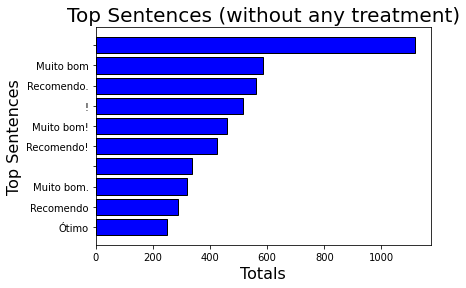

In [210]:
topSentencesLimit = 10
topSentences = df['sentence'].value_counts().index[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
pos = np.arange( topSentencesLimit )
sentenceTotals = df['sentence'].value_counts().values[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
 
plt.barh(
    pos,
    sentenceTotals,
    color='blue',
    edgecolor='black')
plt.yticks( pos, topSentences )
plt.xlabel( 'Totals', fontsize=16 )
plt.ylabel( 'Top Sentences', fontsize=16 )
plt.title( 'Top Sentences (without any treatment)', fontsize=20 )
plt.show()

In [211]:
# sentences = df['sentence'].value_counts().index[ :topSentencesLimit ].tolist()[::-1]
# cleanedSentences = [sentence.lower().strip( ' .!\'️\'' ) for sentence in sentences]
# cleanedSentences = [sentence for sentence in cleanedSentences if len(sentence) > 0 ]
# print( cleanedSentences )
# # print( len(cleanedSentences[3]) )
# # print( cleanedSentences[3] )
# # print( cleanedSentences[3].isspace() )
# # print( not cleanedSentences[3] )

In [212]:
sentences = df['sentence'].tolist()
# [print(sentence) for sentence in sentences]
cleanedSentences = [str(sentence).lower().strip( ' .!\'️\'' ) for sentence in sentences]
# cleanedSentences = [sentence for sentence in cleanedSentences if len(sentence) > 0 ]
dfTopSentences = df
dfTopSentences['sentence'] = cleanedSentences
dfTopSentences['sentence'].head()

0    sabe todos aqueles livros que ensinam você a c...
1    ou daqueles que você termina a leitura sentind...
2    você não vai encontrar um setup milagroso, ou ...
3    basicamente este livro conta verdades sobre o ...
4    mostra os detalhes de uma forma tão direta e b...
Name: sentence, dtype: object

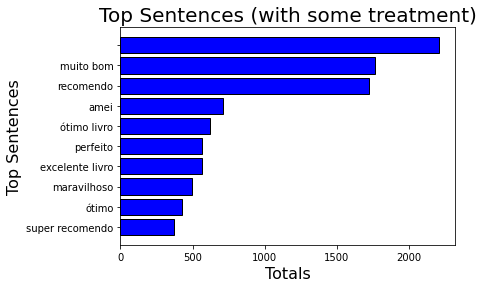

In [213]:
topSentencesLimit = 10
topSentences = dfTopSentences['sentence'].value_counts().index[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
pos = np.arange( topSentencesLimit )
sentenceTotals = dfTopSentences['sentence'].value_counts().values[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
 
plt.barh(
    pos,
    sentenceTotals,
    color='blue',
    edgecolor='black')
plt.yticks( pos, topSentences )
plt.xlabel( 'Totals', fontsize=16 )
plt.ylabel( 'Top Sentences', fontsize=16 )
plt.title( 'Top Sentences (with some treatment)', fontsize=20 )
plt.show()

### A good question to future investigation:

**We can relate these top sentences with users? Maybe the top sentences belongs to the same group of people...**

**But we need to observe privacy before this...**

## Building a Bag of Words (BoW) with the words of the sentences.

In [214]:
lineTotal = 1000

partialDf = df.iloc[ :lineTotal ]
partialDf.head()

,book_id,review_id,review_rating,sentence
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ..."
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...


In [215]:
partialDf.tail()

,book_id,review_id,review_rating,sentence
995,8595081530,RUJUFS5OAVC7B,5,"recomendo demais a leitura, livro bem rápido e..."
996,8595081530,RUWQIYL5YVOP1,5,geralmente livros voltados pra finanças são me...
997,8595081530,R13T7U2ZF4GDCQ,4,um bom primeiro livro
998,8595081530,R13T7U2ZF4GDCQ,4,"aborda conceitos básicos, porém, extremamente ..."
999,8595081530,R2ZXMSGZNG8I9M,5,"amei o livro, chegou super rápido e muito bem ..."


In [216]:
partialDf.shape

(1000, 4)

#### Disable warnings

In [217]:
import warnings
warnings.filterwarnings("ignore")

In [218]:
# for i in range(0, len(partialDf)):
    
#     item = partialDf.iloc[i]
    
#     # print(item)
    
#     doc = nlp( item['sentence'] )
#     tokens = [ token.lemma_ for token in doc ]
    
#     for token in tokens:
        
#         if token not in partialDf.columns:
#             partialDf[ token ] = 0

#         partialDf.iloc[ i ][ token ] = 1
#         # print(partialDf.iloc[ i ][ token ])

# partialDf.head()

In [219]:
def tokenizer( sentence ):
    
    # sentence = sentence.strip("!%'(),-.—“”●♥")
    sentence = sentence.replace("!", "")
    sentence = sentence.replace("%", "")
    sentence = sentence.replace("'", "")
    sentence = sentence.replace("(", "")
    sentence = sentence.replace(")", "")
    sentence = sentence.replace(",", "")
    sentence = sentence.replace("-", "")
    sentence = sentence.replace("—", "")
    sentence = sentence.replace("“", "")
    sentence = sentence.replace("”", "")
    sentence = sentence.replace("●", "")
    sentence = sentence.replace("♥", "")    
    sentence = sentence.replace(".", "")
    sentence = sentence.replace("4", "")
    sentence = sentence.replace("/", "")
    sentence = sentence.replace("03", "")
    sentence = sentence.replace("1", "")
    sentence = sentence.replace("10", "")
    sentence = sentence.replace("115", "")
    sentence = sentence.replace("12", "")
    
    doc = nlp( sentence )
    tokens = [token.lemma_ for token in doc]
    
    return tokens

### BoW - Sparse Matrix - Token Frequency

In [220]:
vectorizer = CountVectorizer(
    tokenizer=tokenizer,
    ngram_range=(1,1))
# X = vectorizer.fit_transform( partialDf['sentence'] )
# print( vectorizer.get_feature_names_out() )
# print( X.toarray() )

dfBowTokenFrequency = pd.DataFrame(
    data = vectorizer.fit_transform( partialDf['sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowTokenFrequency.head(20)

,,,0,2,20,202,2022,207,28,28arkad,...,óbvioo,ótico,ótima,ótimas,ótimo,ótimos,último,único,útil,…
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### BoW - Sparse Matrix - Binary

In [221]:
vectorizer = CountVectorizer(
    tokenizer=tokenizer,
    ngram_range=(1,1),
    binary=True)
# X = vectorizer.fit_transform( partialDf['sentence'] )
# print( vectorizer.get_feature_names_out() )
# print( X.toarray() )

dfBowBinary = pd.DataFrame(
    data = vectorizer.fit_transform( partialDf['sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowBinary.head(20)

,,,0,2,20,202,2022,207,28,28arkad,...,óbvioo,ótico,ótima,ótimas,ótimo,ótimos,último,único,útil,…
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### BoW - Sparse Matrix - TF-IDF

#### https://www.kaggle.com/code/k4puneet/countvectorizer-tfidf-tutorial/notebook

In [222]:
vectorizer = TfidfVectorizer( analyzer = tokenizer )

dfBowTFIDF = pd.DataFrame(
    data = vectorizer.fit_transform( partialDf['sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowTFIDF.head(20)

,,,0,2,20,202,2022,207,28,28arkad,...,óbvioo,ótico,ótima,ótimas,ótimo,ótimos,último,único,útil,…
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Function: classReport

In [235]:
clustersTotal = 5

In [236]:
def classReport( columnLabel, clustersTotal ):

    for i in range(0, clustersTotal):

        print( '===========================================================================' )
        print( f'Representation: {columnLabel} - class: {i}' )
        print( '===========================================================================' )
        print()

        dfClass = partialDf[ partialDf[ columnLabel ] == i ]

        display( dfClass.head(10) )
        print()

        print( f'Sentences by score from class {i}' )
        print( '====================================' )
        print( dfClass[ 'review_rating' ].value_counts().sort_index( ascending=False ) )
        print()

        print( f'Examples from class {i}' )
        print( '====================================' )
        print()

        sentencesClass = dfClass['sentence'].sample(5)
        for sentence in sentencesClass:
            print( sentence )
            print()
            print( '-----------------------------------' )
            print()

        print( '###########################################################################' )
        print( '###########################################################################' )
        print( '###########################################################################' )
        print()

### K-Means - BoW - Sparse Matrix - Token Frequency

In [237]:
kmeans = KMeans(n_clusters=clustersTotal, random_state=0).fit( dfBowTokenFrequency )
kmeans

KMeans(n_clusters=5, random_state=0)

In [238]:
kmeans.labels_

array([1, 4, 1, 2, 3, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4,
       2, 4, 4, 2, 2, 2, 4, 1, 2, 2, 2, 4, 3, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       2, 3, 0, 3, 1, 4, 2, 4, 2, 3, 4, 2, 2, 2, 4, 4, 1, 2, 4, 2, 2, 1,
       1, 2, 1, 3, 4, 4, 4, 4, 4, 0, 2, 2, 2, 3, 4, 4, 2, 3, 1, 4, 4, 4,
       2, 2, 4, 4, 3, 3, 2, 3, 0, 2, 4, 2, 2, 1, 4, 4, 2, 2, 2, 2, 1, 4,
       4, 2, 4, 0, 3, 3, 3, 3, 2, 4, 4, 4, 1, 2, 4, 3, 2, 1, 2, 4, 4, 2,
       0, 3, 1, 3, 2, 3, 2, 4, 2, 2, 2, 0, 4, 2, 1, 2, 2, 2, 2, 1, 3, 2,
       2, 4, 1, 1, 2, 3, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 4, 0, 3, 4, 2,
       1, 1, 1, 4, 2, 0, 4, 2, 4, 2, 2, 4, 2, 4, 3, 3, 4, 3, 2, 3, 2, 4,
       3, 2, 2, 3, 2, 4, 2, 2, 2, 2, 2, 4, 3, 3, 3, 4, 4, 4, 4, 4, 2, 3,
       2, 2, 4, 3, 2, 1, 1, 2, 2, 3, 2, 2, 2, 4, 2, 1, 1, 4, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 3, 4, 1, 2, 4, 4, 2, 1, 2, 2, 3, 4, 2, 2,
       3, 2, 4, 2, 3, 2, 4, 3, 2, 2, 2, 4, 2, 1, 2, 2, 3, 4, 1, 4, 3, 2,
       0, 2, 3, 1, 3, 1, 2, 0, 2, 2, 4, 2, 2, 2, 4,

In [239]:
kmeans.cluster_centers_

array([[ 3.07692308e-01, -2.16840434e-19,  3.84615385e-02, ...,
         1.53846154e-01, -4.33680869e-19,  8.67361738e-19],
       [ 2.96296296e-02, -6.50521303e-19,  2.96296296e-02, ...,
        -5.20417043e-18, -1.30104261e-18, -2.60208521e-18],
       [ 2.76008493e-02,  2.12314225e-03,  8.49256900e-03, ...,
        -4.33680869e-18, -1.30104261e-18,  1.27388535e-02],
       [ 3.25203252e-02, -6.50521303e-19,  1.62601626e-02, ...,
         1.62601626e-02, -1.30104261e-18, -3.46944695e-18],
       [ 5.71428571e-02, -6.50521303e-19,  1.22448980e-02, ...,
         4.08163265e-03,  8.16326531e-03, -2.60208521e-18]])

In [240]:
columnLabel = 'class__bow_token_frequency'

In [241]:
partialDf[columnLabel] = kmeans.labels_
partialDf.head()

,book_id,review_id,review_rating,sentence,class__bow_token_frequency
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,1
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,4
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",1
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,2
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,3


In [242]:
partialDf[columnLabel].value_counts().sort_index()

0     26
1    135
2    471
3    123
4    245
Name: class__bow_token_frequency, dtype: int64

In [243]:
pcaBowTokenFrequency = PCA( n_components=2 )
principalComponentsBowTokenFrequency = pcaBowTokenFrequency.fit_transform( dfBowTokenFrequency )
# principalComponentsBowTokenFrequency
# type(principalComponentsBowTokenFrequency)

In [244]:
'''
array([[ 1.21904561e+00, -1.18886035e+00],
       [ 2.39121079e-01, -3.42411365e-01],
       [-1.36406682e-01,  6.55526438e-01],
'''

a = []
b = []
for item in principalComponentsBowTokenFrequency:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

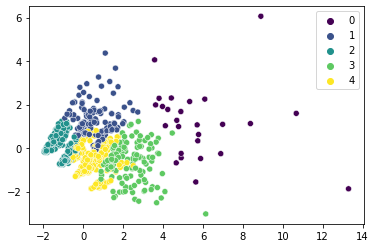

In [245]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### Class Report

In [246]:
classReport( columnLabel, clustersTotal )

Representation: class__bow_token_frequency - class: 0



,book_id,review_id,review_rating,sentence,class__bow_token_frequency
46,8595081530,R2UADYH9X17S5V,4,"sucinto livro de parábolas, o homem mais rico ...",0
75,8595081530,R17E1E7TALNLBD,5,as idéias principais do livro são:1.de cada de...,0
96,8595081530,R17E1E7TALNLBD,5,e não se deixe enganar sob o romantismo de enr...,0
113,8595081530,R17E1E7TALNLBD,5,o ouro vem de bom grado e numa quantidade cres...,0
132,8595081530,R17E1E7TALNLBD,5,do capítulo 7 sobre as muralhas da babilônia p...,0
143,8595081530,R3RAD7COFBOKEM,5,"e no centro dessa roda, um grande sábio conta ...",0
172,8595081530,RTZKT8JX3Z4VU,4,talvez o único defeito seja a falta de demonst...,0
181,8595081530,R2RSPLKPAOZNY9,4,para quem é estudioso da área de economia o li...,0
286,8595081530,RRCYLO20S6TXC,5,com os textos ainda é possível retirar ensinam...,0
293,8595081530,R2O7263Y39RKM8,2,"livro parecer ser inscrito para uma criança, p...",0



Sentences by score from class 0
5    21
4     4
2     1
Name: review_rating, dtype: int64

Examples from class 0

um livro esplêndido, que nos auxilia e nos mostra algumas verdades sobre o ouro e os tesouros desta terra, entendemos através das histórias apresentadas, que para se ter o ouro e riquezas, primeiro tem que se ter uma mente firme e concreta

-----------------------------------

o processo de enriquecimento é como o plantar de uma árvore: primeiro plantamos a primeira semente através de uma simples moeda, depois devemos regá-la e cultivá-la frequentemente com novos aportes, para que assim a nossa árvore cresça e um dia, sob o deleite de sua sombra, poderemos descansar tranquilamente observando o cair das folhas

-----------------------------------

de uma leitura apaixonante!desperta uma vontade de poder ler todas as páginas de uma única vez!é de uma leitura que impacta para despertar mudanças necessárias no que de respeito a forma de lidar com o dinheiro

------------------

,book_id,review_id,review_rating,sentence,class__bow_token_frequency
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,1
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",1
29,8595081530,R3KC0ZLPQX85LT,5,devemos guardar uma parte do que ganhamos para...,1
48,8595081530,RGJ6BAA0J8P77,5,de forma clara traz ensinamentos sobre educaçã...,1
60,8595081530,R3O9BCBUG7LI29,5,é uma ficção em forma de fábulas com objetivo ...,1
65,8595081530,R102K5ZA97V7VT,3,"bom livro, nada excepcional, é um livro de min...",1
66,8595081530,R102K5ZA97V7VT,3,é um bom livro pra quem ta pensando em começar...,1
68,8595081530,R17E1E7TALNLBD,5,o significado do sucesso e liberdade financeir...,1
84,8595081530,R17E1E7TALNLBD,5,"além disso, aponta que quem aceita conselho so...",1
101,8595081530,R17E1E7TALNLBD,5,e de acordo com o princípio de napoleon hill e...,1



Sentences by score from class 1
5    103
4     19
3     10
1      3
Name: review_rating, dtype: int64

Examples from class 1

o livro mostra que basta saber como economizar e investir para se tornar rico (de dinheiro).recomendo

-----------------------------------

além disso, aponta que quem aceita conselho sobre suas economias de pessoas inexperientes em tais matérias pagará com essas mesas economias a falsidade da opinião dos outros

-----------------------------------

quitação de dívidas, investir sempre pelo menos 1/10 do salário, visão de longo prazo e o poder do trabalho

-----------------------------------

lições extremamente valiosas sobre trabalho e prosperidade financeira são passadas através de relatos inspiradores como escravos que conquistam sua liberdade através de trabalho árduo, amizades forjadas em momentos de tribulações inimagináveis em tempos atuais e conquista de confiança de mentores grandiosos

-----------------------------------

o leitor encontrará conceito

,book_id,review_id,review_rating,sentence,class__bow_token_frequency
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,2
6,8595081530,RM0NBXMBSU4M3,4,ps.:,2
7,8595081530,RM0NBXMBSU4M3,4,gostei da textura do papel e da boa qualidade ...,2
8,8595081530,RM0NBXMBSU4M3,4,recomendo muito,2
9,8595081530,R3KC0ZLPQX85LT,5,ensinamentos que eu tive quando li o livro:1,2
10,8595081530,R3KC0ZLPQX85LT,5,primeiro pague a si mesmo e depois aos outros,2
14,8595081530,R3KC0ZLPQX85LT,5,as outras 9 moedas você pode gastar,2
15,8595081530,R3KC0ZLPQX85LT,5,"mas quando se diz em gastar, estão falando das...",2
16,8595081530,R3KC0ZLPQX85LT,5,"gastar com necessidades, e não com desejos",2
17,8595081530,R3KC0ZLPQX85LT,5,precisamos gastar menos do que ganhamos.2,2



Sentences by score from class 2
5    371
4     58
3     14
2     14
1     14
Name: review_rating, dtype: int64

Examples from class 2

tudo que deveríamos saber para obter sucesso financeiro na vida, num texto simples e direto

-----------------------------------

simplesmente fantástico esse livro,

-----------------------------------

mais rico da babilônia,

-----------------------------------

porém, achei desinteressante

-----------------------------------

como eu faço pra ficar rico?

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_token_frequency - class: 3



,book_id,review_id,review_rating,sentence,class__bow_token_frequency
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,3
34,8595081530,R3KC0ZLPQX85LT,5,pessoas procrastinadoras deixam tudo para a úl...,3
45,8595081530,R3KC0ZLPQX85LT,5,devemos sempre nos aperfeiçoar e aprender com ...,3
47,8595081530,R2UADYH9X17S5V,4,embora tenha alguns conceitos hoje contestados...,3
53,8595081530,R2CMLSZODT5PMM,4,o livro traz lições importantes como:-busque c...,3
69,8595081530,R17E1E7TALNLBD,5,"segundo o autor, o propósito é justamente ofer...",3
79,8595081530,R17E1E7TALNLBD,5,"após a contextualização da história, o livro i...",3
83,8595081530,R17E1E7TALNLBD,5,arkad ainda acrescenta que se deve guardar no ...,3
92,8595081530,R17E1E7TALNLBD,5,o objetivo é ajudar a juntar dinheiro de manei...,3
93,8595081530,R17E1E7TALNLBD,5,o orçamento deixa descoberto os vazamentos em ...,3



Sentences by score from class 3
5    103
4     15
3      4
1      1
Name: review_rating, dtype: int64

Examples from class 3

é sensacional a sensação de pôr a imaginação para funcionar e poder imergir naquele cenário de cerca de 3.000 a

-----------------------------------

o livro faz-te mergulhar na história e querer cada vez mais, além de estudar finanças, acaba lendo uma excelente e uma imersão na história fantástica

-----------------------------------

a leitura muito similar a bíblia por contar a história que se passou a milhares de anos

-----------------------------------

publicado pela primeira vez na década de 1920, o homem mis rico da babilônia elenca princípios financeiros presentes na cultura da civilização babilônica os quais se fazem pertinentes até a atualidade

-----------------------------------

as mensagens que o livro busca passar são interessantes, mas o mesmo pode ser encontrado no livro

-----------------------------------

##################################

,book_id,review_id,review_rating,sentence,class__bow_token_frequency
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,4
5,8595081530,RM0NBXMBSU4M3,4,só não ganha 5 estrelas pois acredito que a ar...,4
11,8595081530,R3KC0ZLPQX85LT,5,“uma parte de todos os seus ganhos pertencem e...,4
12,8595081530,R3KC0ZLPQX85LT,5,"”quando trabalhamos e recebemos o dinheiro, é ...",4
13,8595081530,R3KC0ZLPQX85LT,5,"no livro se fala que se você ganha 10 moedas, ...",4
19,8595081530,R3KC0ZLPQX85LT,5,muitas pessoas acham que o salário que ganham ...,4
21,8595081530,R3KC0ZLPQX85LT,5,é necessário examinar cuidadosamente seu habit...,4
23,8595081530,R3KC0ZLPQX85LT,5,depois que você conseguir guardar o seu dinhei...,4
24,8595081530,R3KC0ZLPQX85LT,5,"é importante investir o seu dinheiro, não deix...",4
28,8595081530,R3KC0ZLPQX85LT,5,é essencial que tenhamos um dinheiro guardado ...,4



Sentences by score from class 4
5    190
4     32
3      9
2      6
1      8
Name: review_rating, dtype: int64

Examples from class 4

inclusive aconselho o incentivo da leitura deste best seller para todas as crianças, para que assim fique imputado tais princípios, tornando nosso pais uma nação melhor

-----------------------------------

ele relata que o desejo é condição para a realização

-----------------------------------

um livro muito bom, de fácil leitura e interpretação, sem contar que o seu conteúdo é possível colocar na prática

-----------------------------------

para quem não tem o hábito da leitura do último, recomendo o homem mais rico

-----------------------------------

o desejo é a condição para realizaçãodesejos gerais não passam de vagas inspiração

-----------------------------------

###########################################################################
###########################################################################
##########################

### K-Means - BoW - Sparse Matrix - Binary

In [247]:
kmeans = KMeans(n_clusters=clustersTotal, random_state=0).fit( dfBowBinary )
kmeans

KMeans(n_clusters=5, random_state=0)

In [248]:
kmeans.labels_

array([1, 2, 3, 2, 1, 4, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 4, 2, 4,
       2, 3, 2, 2, 0, 2, 4, 1, 0, 0, 0, 2, 4, 2, 2, 4, 1, 2, 1, 2, 0, 0,
       0, 1, 4, 1, 3, 2, 2, 2, 0, 3, 3, 2, 0, 0, 4, 4, 1, 0, 2, 3, 2, 4,
       4, 4, 3, 1, 2, 2, 2, 2, 2, 1, 0, 0, 3, 3, 1, 4, 2, 1, 2, 1, 4, 2,
       2, 2, 2, 1, 2, 3, 0, 1, 1, 0, 2, 0, 0, 3, 2, 2, 0, 2, 0, 0, 4, 2,
       2, 2, 2, 4, 3, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 4, 2, 0,
       1, 2, 4, 1, 0, 1, 0, 1, 0, 0, 0, 4, 2, 0, 3, 0, 0, 2, 0, 1, 3, 0,
       0, 4, 4, 3, 1, 3, 4, 0, 0, 2, 2, 2, 0, 1, 4, 0, 0, 3, 1, 1, 3, 2,
       1, 2, 1, 2, 0, 1, 1, 0, 4, 0, 2, 1, 0, 2, 3, 4, 4, 3, 2, 3, 2, 2,
       2, 2, 2, 4, 2, 2, 0, 2, 0, 0, 3, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 2, 2, 3, 2, 2, 0, 4, 2, 0, 0, 2, 0, 2, 3, 2, 0, 3, 0, 2,
       0, 0, 2, 0, 2, 2, 2, 0, 3, 4, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 0,
       1, 0, 2, 2, 3, 0, 3, 3, 0, 0, 0, 2, 0, 4, 0, 0, 1, 4, 4, 1, 1, 0,
       4, 0, 1, 4, 4, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2,

In [249]:
kmeans.cluster_centers_

array([[ 3.29670330e-02,  3.66300366e-03,  1.09890110e-02, ...,
        -5.20417043e-18, -1.30104261e-18,  1.83150183e-02],
       [ 8.00000000e-02, -6.50521303e-19,  4.80000000e-02, ...,
         2.40000000e-02, -1.30104261e-18, -2.60208521e-18],
       [ 3.02114804e-02, -6.50521303e-19,  3.02114804e-03, ...,
         3.02114804e-03,  3.02114804e-03,  3.02114804e-03],
       [ 2.56410256e-02, -6.50521303e-19,  1.70940171e-02, ...,
         8.54700855e-03, -1.30104261e-18, -2.60208521e-18],
       [ 4.54545455e-02, -6.50521303e-19,  1.29870130e-02, ...,
         1.29870130e-02,  6.49350649e-03, -3.46944695e-18]])

In [250]:
columnLabel = 'class__bow_binary'

In [251]:
partialDf[columnLabel] = kmeans.labels_
partialDf.head()

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,1,1
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,4,2
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",1,3
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,2,2
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,3,1


In [252]:
partialDf[columnLabel].value_counts().sort_index()

0    273
1    125
2    331
3    117
4    154
Name: class__bow_binary, dtype: int64

In [253]:
pcaBowBinary = PCA( n_components=2 )
principalComponentsBowBinary = pcaBowBinary.fit_transform( dfBowBinary )
# principalComponentsBowBinary
# type(principalComponentsBowBinary)

In [254]:
'''
array([[ 1.21904561e+00, -1.18886035e+00],
       [ 2.39121079e-01, -3.42411365e-01],
       [-1.36406682e-01,  6.55526438e-01],
'''

a = []
b = []
for item in principalComponentsBowBinary:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

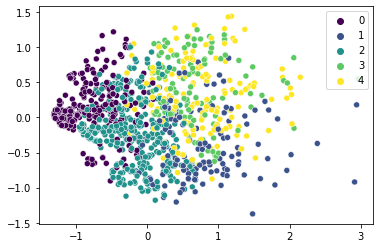

In [255]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### Class Report

In [256]:
classReport( columnLabel, clustersTotal )

Representation: class__bow_binary - class: 0



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
6,8595081530,RM0NBXMBSU4M3,4,ps.:,2,0
7,8595081530,RM0NBXMBSU4M3,4,gostei da textura do papel e da boa qualidade ...,2,0
8,8595081530,RM0NBXMBSU4M3,4,recomendo muito,2,0
15,8595081530,R3KC0ZLPQX85LT,5,"mas quando se diz em gastar, estão falando das...",2,0
16,8595081530,R3KC0ZLPQX85LT,5,"gastar com necessidades, e não com desejos",2,0
17,8595081530,R3KC0ZLPQX85LT,5,precisamos gastar menos do que ganhamos.2,2,0
26,8595081530,R3KC0ZLPQX85LT,5,"não adianta só poupar, devemos investir.4",2,0
30,8595081530,R3KC0ZLPQX85LT,5,não seja um procrastinador,2,0
31,8595081530,R3KC0ZLPQX85LT,5,devemos focar em nossos objetivos,2,0
32,8595081530,R3KC0ZLPQX85LT,5,"muitas pessoas querem ganhar dinheiro, porém, ...",2,0



Sentences by score from class 0
5    208
4     34
3     11
2     10
1     10
Name: review_rating, dtype: int64

Examples from class 0

não gastar mais do que se ganha

-----------------------------------

buscar e compartilhar mais conhecimentos com pessoas entendidas

-----------------------------------

● e aí eu encontro esse livro

-----------------------------------

excelente para iniciantes estão iniciando qualquer um desses trilhos

-----------------------------------

não ter medo de recomeçar

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_binary - class: 1



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,1,1
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,3,1
12,8595081530,R3KC0ZLPQX85LT,5,"”quando trabalhamos e recebemos o dinheiro, é ...",4,1
13,8595081530,R3KC0ZLPQX85LT,5,"no livro se fala que se você ganha 10 moedas, ...",4,1
29,8595081530,R3KC0ZLPQX85LT,5,devemos guardar uma parte do que ganhamos para...,1,1
38,8595081530,R3KC0ZLPQX85LT,5,"em uma passagem do livro, se fala que não deve...",4,1
40,8595081530,R3KC0ZLPQX85LT,5,"temos que ter segurança, pois é isso que busca...",4,1
45,8595081530,R3KC0ZLPQX85LT,5,devemos sempre nos aperfeiçoar e aprender com ...,3,1
47,8595081530,R2UADYH9X17S5V,4,embora tenha alguns conceitos hoje contestados...,3,1
60,8595081530,R3O9BCBUG7LI29,5,é uma ficção em forma de fábulas com objetivo ...,1,1



Sentences by score from class 1
5    101
4     18
3      2
2      3
1      1
Name: review_rating, dtype: int64

Examples from class 1

a forma como os homens da babilônia enxergavam o dinheiro é tida até hoje como uma das melhores estratégias para o acúmulo de patrimônio

-----------------------------------

esse livro deveria ser obrigatório nas escolas, aliás, se todos tivéssemos educação financeira desde criança, talvez não teríamos tantos problemas nessa área quando adultos e conseguiríamos sair da escravidão das dívidas e dependência financeira em que muitos se encontram, inclusive eu

-----------------------------------

”quando trabalhamos e recebemos o dinheiro, é essencial que peguemos uma parte para guardar

-----------------------------------

mas para os demais o livro não traz nenhuma novidade ou dica valiosa, em suma, gaste menos do que ganha e será próspero financeiramente

-----------------------------------

o livro é de fácil leitura e pode-se terminar a leitura faci

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,4,2
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,2,2
9,8595081530,R3KC0ZLPQX85LT,5,ensinamentos que eu tive quando li o livro:1,2,2
10,8595081530,R3KC0ZLPQX85LT,5,primeiro pague a si mesmo e depois aos outros,2,2
11,8595081530,R3KC0ZLPQX85LT,5,“uma parte de todos os seus ganhos pertencem e...,4,2
14,8595081530,R3KC0ZLPQX85LT,5,as outras 9 moedas você pode gastar,2,2
18,8595081530,R3KC0ZLPQX85LT,5,controle os seus gastos,2,2
20,8595081530,R3KC0ZLPQX85LT,5,"por isso, precisamos saber exatamente no que g...",2,2
22,8595081530,R3KC0ZLPQX85LT,5,multiplique o seu dinheiro,2,2
24,8595081530,R3KC0ZLPQX85LT,5,"é importante investir o seu dinheiro, não deix...",4,2



Sentences by score from class 2
5    262
4     39
3     12
2      7
1     11
Name: review_rating, dtype: int64

Examples from class 2

estou avaliando apenas a entrega!1

-----------------------------------

além disso, aponta que quem aceita conselho sobre suas economias de pessoas inexperientes em tais matérias pagará com essas mesas economias a falsidade da opinião dos outros

-----------------------------------

recomendo a leitura, que é leve e enriquecedora

-----------------------------------

a leitura foi bastante proveitosa e não é tão difícil vê algumas situações do livro sendo aplicadas na minha vida

-----------------------------------

publicado pela primeira vez na década de 1920, o homem mis rico da babilônia elenca princípios financeiros presentes na cultura da civilização babilônica os quais se fazem pertinentes até a atualidade

-----------------------------------

###########################################################################
##########################

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",1,3
23,8595081530,R3KC0ZLPQX85LT,5,depois que você conseguir guardar o seu dinhei...,4,3
48,8595081530,RGJ6BAA0J8P77,5,de forma clara traz ensinamentos sobre educaçã...,1,3
53,8595081530,R2CMLSZODT5PMM,4,o livro traz lições importantes como:-busque c...,3,3
54,8595081530,R2CMLSZODT5PMM,4,o homem mais rico da babilônia possui muitas o...,4,3
63,8595081530,R3O9BCBUG7LI29,5,se você já consegue poupar seu dinheiro ou já ...,2,3
68,8595081530,R17E1E7TALNLBD,5,o significado do sucesso e liberdade financeir...,1,3
78,8595081530,R17E1E7TALNLBD,5,t. harv eker (deixei lá uma resenha bem comple...,2,3
79,8595081530,R17E1E7TALNLBD,5,"após a contextualização da história, o livro i...",3,3
93,8595081530,R17E1E7TALNLBD,5,o orçamento deixa descoberto os vazamentos em ...,3,3



Sentences by score from class 3
5    102
4     11
3      1
1      3
Name: review_rating, dtype: int64

Examples from class 3

o livro mostra que basta saber como economizar e investir para se tornar rico (de dinheiro).recomendo

-----------------------------------

as lições presentes aqui é de fato mágico, você consegue trazer esse livro de quase 1 século pros dias atuais e contudo trazer os ensinamentos dos babilônios com dinheiro

-----------------------------------

você não vai encontrar um setup milagroso, ou algum tipo de mindset do gênero pnl a partir de agora eu domino meu dinheiro

-----------------------------------

como recompensa, e devido às competências adquiridas, algamish oferece a arkad a administração de suas terras e o inclui como um dos herdeiros

-----------------------------------

pelo terceiro ano consecutivo, arkad poupa um décimo e confia suas economias a aggar, o fazedor de escudos, para comprar bronze

-----------------------------------

################

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
5,8595081530,RM0NBXMBSU4M3,4,só não ganha 5 estrelas pois acredito que a ar...,4,4
19,8595081530,R3KC0ZLPQX85LT,5,muitas pessoas acham que o salário que ganham ...,4,4
21,8595081530,R3KC0ZLPQX85LT,5,é necessário examinar cuidadosamente seu habit...,4,4
28,8595081530,R3KC0ZLPQX85LT,5,é essencial que tenhamos um dinheiro guardado ...,4,4
34,8595081530,R3KC0ZLPQX85LT,5,pessoas procrastinadoras deixam tudo para a úl...,3,4
37,8595081530,R3KC0ZLPQX85LT,5,é necessário saber aonde investir os seus frut...,4,4
46,8595081530,R2UADYH9X17S5V,4,"sucinto livro de parábolas, o homem mais rico ...",0,4
58,8595081530,R3O9BCBUG7LI29,5,"no inicio, achei que era só mais um livro de a...",4,4
59,8595081530,R3O9BCBUG7LI29,5,o livro é da década de 1920 e não tem a pegada...,4,4
65,8595081530,R102K5ZA97V7VT,3,"bom livro, nada excepcional, é um livro de min...",1,4



Sentences by score from class 4
5    115
4     26
3     11
2      1
1      1
Name: review_rating, dtype: int64

Examples from class 4

com certeza, um livro que daria de presente a qualquer pessoa

-----------------------------------

geralmente livros voltados pra finanças são meio chatos, mas esse cheio de histórias para ilustração, realmente abre a nossa mente, e eu me identifiquei muito com a história

-----------------------------------

é um livro daqueles clássicos e recomendo a todos, principalmente aos que estão começando a trabalhar e ganhar seu próprio dinheiro

-----------------------------------

após ler esse livro eu pude compreender que tudo que existe atualmente sobre o assunto educação financeira é oriundo deste livro

-----------------------------------

é claro que é um processo contínuo, e muitos livros poderão agregar

-----------------------------------

###########################################################################
#################################

### K-Means - BoW - Sparse Matrix - TF-IDF

In [257]:
kmeans = KMeans(n_clusters=clustersTotal, random_state=0).fit( dfBowTFIDF )
kmeans

KMeans(n_clusters=5, random_state=0)

In [258]:
kmeans.labels_

array([2, 0, 2, 3, 2, 3, 0, 1, 4, 0, 0, 2, 2, 2, 0, 0, 3, 0, 0, 3, 3, 2,
       2, 2, 3, 2, 3, 0, 2, 2, 3, 0, 0, 3, 2, 1, 0, 3, 3, 2, 2, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 1, 3, 0, 3, 2, 0, 1, 0, 2, 3, 2, 0, 4, 2, 1, 1,
       3, 0, 2, 2, 0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 2, 3, 0, 2, 3, 0, 0, 3, 1, 3, 3, 3, 3, 2, 3,
       1, 1, 0, 2, 2, 2, 3, 2, 0, 2, 0, 2, 2, 3, 3, 2, 2, 2, 0, 3, 3, 3,
       2, 3, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 3, 2, 2, 0,
       3, 1, 2, 2, 2, 2, 1, 3, 0, 0, 0, 0, 2, 3, 3, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 3, 0, 0, 0, 3, 2, 0, 2, 2, 2, 3, 2, 0, 2, 0, 0,
       3, 3, 3, 2, 2, 2, 0, 3, 0, 0, 2, 0, 3, 2, 2, 2, 2, 3, 2, 0, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 3, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2,
       0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 3, 2, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 2, 3, 2, 0, 2, 2, 1, 3, 0, 4, 0, 0, 0, 1, 3, 2, 2, 2, 2, 0,
       2, 1, 2, 2, 2, 2, 1, 2, 0, 1, 3, 0, 0, 0, 0,

In [259]:
kmeans.cluster_centers_

array([[ 8.14660879e-03,  1.74062750e-03,  5.53088457e-03, ...,
         7.61108385e-04,  5.42101086e-19,  1.35786949e-02],
       [ 1.49173332e-02,  3.25260652e-19,  2.60208521e-18, ...,
         6.50521303e-19,  5.42101086e-19,  1.73472348e-18],
       [ 6.86969513e-03, -4.33680869e-19,  6.30399602e-03, ...,
         3.54095737e-03,  9.78320132e-04, -4.33680869e-18],
       [ 1.11413911e-02,  4.33680869e-19,  3.03576608e-18, ...,
         2.16840434e-19,  1.55888836e-03,  3.46944695e-18],
       [ 1.73472348e-18, -1.08420217e-19,  8.67361738e-19, ...,
         0.00000000e+00,  0.00000000e+00, -8.67361738e-19]])

In [260]:
columnLabel = 'class__bow_tfidf'

In [261]:
partialDf[columnLabel] = kmeans.labels_
partialDf.head()

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,1,1,2
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,4,2,0
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",1,3,2
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,2,2,3
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,3,1,2


In [262]:
partialDf[columnLabel].value_counts().sort_index()

0    294
1    131
2    335
3    206
4     34
Name: class__bow_tfidf, dtype: int64

In [263]:
pca = PCA( n_components=2 )
principalComponents = pca.fit_transform( dfBowTFIDF )

In [264]:
'''
array([[ 1.21904561e+00, -1.18886035e+00],
       [ 2.39121079e-01, -3.42411365e-01],
       [-1.36406682e-01,  6.55526438e-01],
'''

a = []
b = []
for item in principalComponents:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

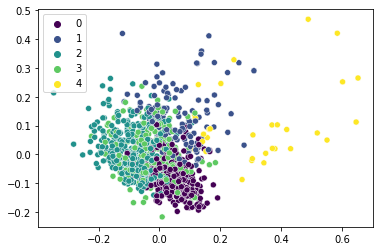

In [265]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### Class Report

In [266]:
classReport( columnLabel, clustersTotal )

Representation: class__bow_tfidf - class: 0



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,4,2,0
6,8595081530,RM0NBXMBSU4M3,4,ps.:,2,0,0
9,8595081530,R3KC0ZLPQX85LT,5,ensinamentos que eu tive quando li o livro:1,2,2,0
10,8595081530,R3KC0ZLPQX85LT,5,primeiro pague a si mesmo e depois aos outros,2,2,0
14,8595081530,R3KC0ZLPQX85LT,5,as outras 9 moedas você pode gastar,2,2,0
15,8595081530,R3KC0ZLPQX85LT,5,"mas quando se diz em gastar, estão falando das...",2,0,0
17,8595081530,R3KC0ZLPQX85LT,5,precisamos gastar menos do que ganhamos.2,2,0,0
18,8595081530,R3KC0ZLPQX85LT,5,controle os seus gastos,2,2,0
27,8595081530,R3KC0ZLPQX85LT,5,assegure uma renda para o futuro,2,2,0
31,8595081530,R3KC0ZLPQX85LT,5,devemos focar em nossos objetivos,2,0,0



Sentences by score from class 0
5    226
4     33
3     12
2     13
1     10
Name: review_rating, dtype: int64

Examples from class 0

se eu pudesse daria 10 estrelas para esse livro

-----------------------------------

pela simplicidade, também são inspiradores

-----------------------------------

ai complica, né? ,)

-----------------------------------

aí surge a necessidade de buscarmos opções para termos um melhor controle das nossas finanças

-----------------------------------

até que percebi que o livro veio incompleto

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_tfidf - class: 1



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
7,8595081530,RM0NBXMBSU4M3,4,gostei da textura do papel e da boa qualidade ...,2,0,1
35,8595081530,R3KC0ZLPQX85LT,5,“os homens de ação são favorecidos pela deusa ...,2,2,1
46,8595081530,R2UADYH9X17S5V,4,"sucinto livro de parábolas, o homem mais rico ...",0,4,1
50,8595081530,RZ65FZEPU1Y8V,1,o livro,2,2,1
56,8595081530,R3O9BCBUG7LI29,5,livro proveitoso e de fácil leitura,2,0,1
64,8595081530,R3O9BCBUG7LI29,5,o livro chegou sem nenhum problema e foi entre...,2,2,1
65,8595081530,R102K5ZA97V7VT,3,"bom livro, nada excepcional, é um livro de min...",1,4,1
103,8595081530,R17E1E7TALNLBD,5,no capítulo 4 ele relata sobre a “deusa da boa...,4,2,1
110,8595081530,R17E1E7TALNLBD,5,a boa sorte pode ser atraída desde que estejam...,4,2,1
111,8595081530,R17E1E7TALNLBD,5,os homens de ação são favorecidos pela deusa d...,2,2,1



Sentences by score from class 1
5    95
4    24
3     5
2     2
1     5
Name: review_rating, dtype: int64

Examples from class 1

já devorei o livro todo 2 vezes, leitura muito boa e de fato, a essência dele faz você ter uma noção de como mudar a dinâmica da questão financeira

-----------------------------------

um livro essencial pra quem quer enriquecer, a muitos ensinamentos que podem ser extraídos desse livro

-----------------------------------

o livro é de boa qualidade e chegou bem rápido, quanto ao conteúdo, possui o básico que alguém precisa para iniciar, conceitos simples e que são repetidos ao longo do livro (para melhor fixação, acredito)

-----------------------------------

muito válido

-----------------------------------

quem seguiu à risca tais preceitos tem boas chances de conquistar uma paz financeira

-----------------------------------

###########################################################################
#################################################

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,1,1,2
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",1,3,2
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,3,1,2
11,8595081530,R3KC0ZLPQX85LT,5,“uma parte de todos os seus ganhos pertencem e...,4,2,2
12,8595081530,R3KC0ZLPQX85LT,5,"”quando trabalhamos e recebemos o dinheiro, é ...",4,1,2
13,8595081530,R3KC0ZLPQX85LT,5,"no livro se fala que se você ganha 10 moedas, ...",4,1,2
21,8595081530,R3KC0ZLPQX85LT,5,é necessário examinar cuidadosamente seu habit...,4,4,2
22,8595081530,R3KC0ZLPQX85LT,5,multiplique o seu dinheiro,2,2,2
23,8595081530,R3KC0ZLPQX85LT,5,depois que você conseguir guardar o seu dinhei...,4,3,2
25,8595081530,R3KC0ZLPQX85LT,5,pegue suas economias para que elas possam lhe ...,2,2,2



Sentences by score from class 2
5    280
4     37
3     10
2      3
1      5
Name: review_rating, dtype: int64

Examples from class 2

se você seguir as orientações desse livro, com certeza vai transformar a sua vida, assim como começou a transformar a minha

-----------------------------------

quitação de dívidas, investir sempre pelo menos 1/10 do salário, visão de longo prazo e o poder do trabalho

-----------------------------------

e, ainda, compara a experiência dos mais velhos às “estrelas fixas que, sem mudar de lugar, auxiliam o marinheiro a orientar o seu curso”

-----------------------------------

eu particularmente gosto muito de ler livros de auto ajuda e livros de finanças.o livro mais indicado para quem quer iniciar os estudos financeiros, ou apenas saber lidar melhor com o dinheiro

-----------------------------------

devemos guardar uma parte do que ganhamos para tal fato, ter uma reserva de emergência e colocarmos metas para cumpri-la.5

-------------------------

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,2,2,3
5,8595081530,RM0NBXMBSU4M3,4,só não ganha 5 estrelas pois acredito que a ar...,4,4,3
16,8595081530,R3KC0ZLPQX85LT,5,"gastar com necessidades, e não com desejos",2,0,3
19,8595081530,R3KC0ZLPQX85LT,5,muitas pessoas acham que o salário que ganham ...,4,4,3
20,8595081530,R3KC0ZLPQX85LT,5,"por isso, precisamos saber exatamente no que g...",2,2,3
24,8595081530,R3KC0ZLPQX85LT,5,"é importante investir o seu dinheiro, não deix...",4,2,3
26,8595081530,R3KC0ZLPQX85LT,5,"não adianta só poupar, devemos investir.4",2,0,3
30,8595081530,R3KC0ZLPQX85LT,5,não seja um procrastinador,2,0,3
33,8595081530,R3KC0ZLPQX85LT,5,"para se alcançar a riqueza, é necessário corre...",4,2,3
37,8595081530,R3KC0ZLPQX85LT,5,é necessário saber aonde investir os seus frut...,4,4,3



Sentences by score from class 3
5    160
4     29
3      9
2      3
1      5
Name: review_rating, dtype: int64

Examples from class 3

depois que li, parece tão óbvio erros que cometia e não sabia

-----------------------------------

recomendo para quem não tem a menor ideia de como administrar o que tem, e principalmente o que não tem

-----------------------------------

e ele deve ser forte e definido

-----------------------------------

é um livro que não é chato de ler por ser conteúdos de investimentos e finanças, pois as lições são dadas por meio de histórias

-----------------------------------

”confesso que ao ver meus alunos fazendo essas constatações me enchi de orgulho, orgulho pelo o esforço que fizeram para ler o livro, orgulho por terem conseguido interpretar e orgulho por terem topado esse projeto

-----------------------------------

###########################################################################
#########################################################

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
8,8595081530,RM0NBXMBSU4M3,4,recomendo muito,2,0,4
62,8595081530,R3O9BCBUG7LI29,5,recomendo o livro com uma primeira leitura no ...,4,2,4
275,8595081530,R2HGKL55GX54JT,3,para quem não tem o hábito da leitura do últim...,4,2,4
325,8595081530,RHX4DZRH7EGGV,5,"recomendo a leitura, que é leve e enriquecedora",4,2,4
339,8595081530,R36HAB2R9FS3U8,5,"e, quem diria, hoje eu sou mais um a citar e r...",4,4,4
364,8595081530,R34G4MSHAYYSVJ,5,super recomendo colocar prática mesmo que simp...,2,2,4
418,8595081530,R9LBBCW5QN15E,4,recomendo o livro bastante por conta de seu va...,2,2,4
460,8595081530,R1ETCTLV636KHV,5,recomendo,2,0,4
523,8595081530,R2A95ZWUL1EVJE,4,"agora, se quiseres construir uma visão em torn...",2,2,4
530,8595081530,R3V4PO5NYIYKRT,5,"recomendo fortemente para qualquer pessoa, pri...",2,2,4



Sentences by score from class 4
5    27
4     5
3     1
1     1
Name: review_rating, dtype: int64

Examples from class 4

recomendado para iniciantes

-----------------------------------

recomendo muito

-----------------------------------

leitura recomendada

-----------------------------------

não recomendo

-----------------------------------

recomendo

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

